In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df[['Operating Airline']].value_counts()

Operating Airline               
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Icelandair EHF                         2
Evergreen International Airlines       2
Atlas Air, Inc                         2
Xtra Airways                           2
Boeing Company                         1
Length: 89, dtype: int64

In [5]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804
18884,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243


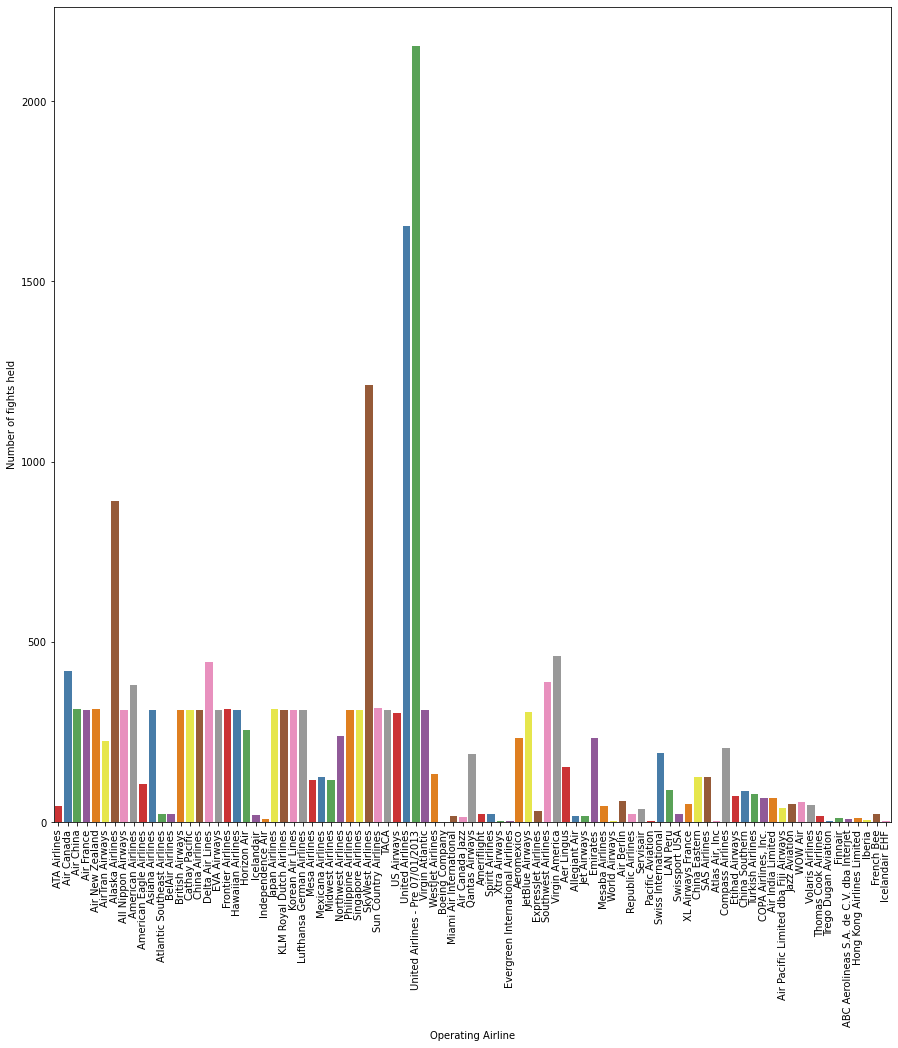

In [6]:
plt.figure(figsize=(15,15))
sns.countplot(x='Operating Airline',data=df,palette='Set1')  # Graphical display of airlines by the number of businesses.
plt.xticks(rotation=90)
plt.ylabel('Number of fights held')
plt.show();

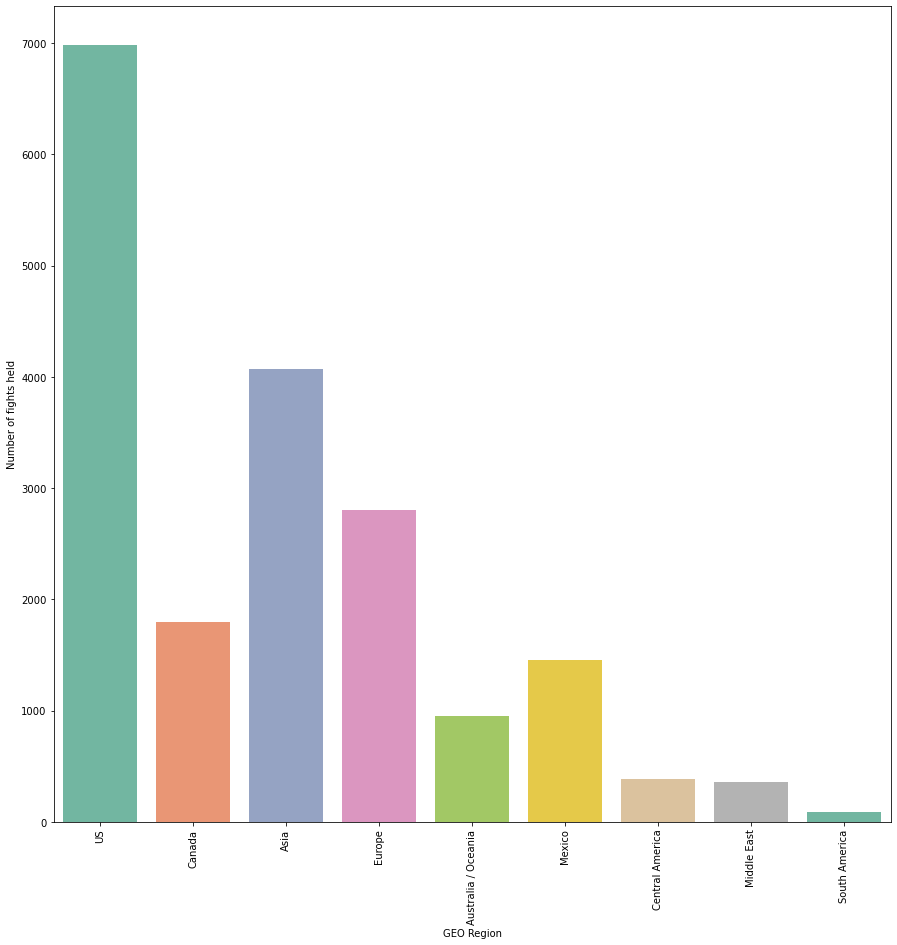

In [7]:
plt.figure(figsize=(15,15))
sns.countplot(x='GEO Region',palette='Set2',data=df)  #Graphic display of the total number of airlines by geographic region
plt.xticks(rotation=90)
plt.ylabel('Number of fights held')
plt.show();

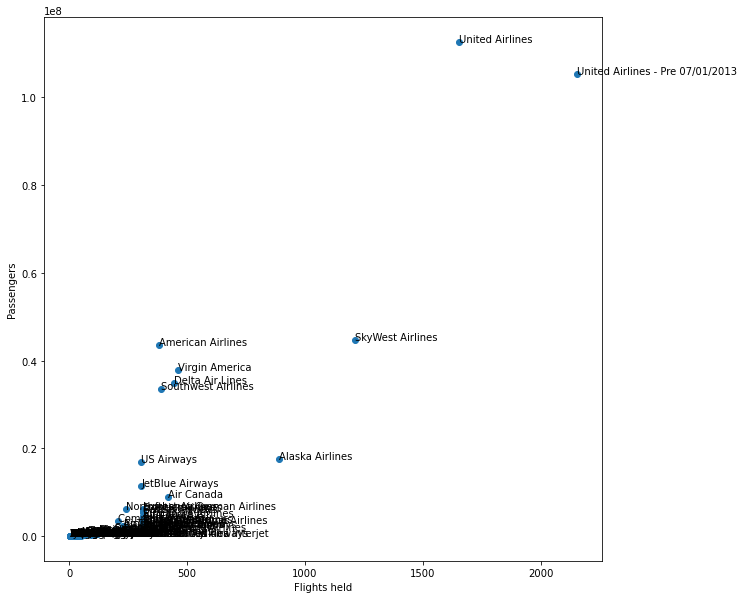

In [8]:
airline_count=df['Operating Airline'].value_counts() 
# We found the number of the airline company.
airline_count.sort_index(inplace=True) 
# We sorted by index tag.
passenger_count=df.groupby('Operating Airline')['Passenger Count'].sum() 
# We found the total number of passengers by airline companies.
passenger_count.sort_index(inplace=True) #index etiketine göre sıraladık.
from sklearn.preprocessing import scale 
x=airline_count.values # We get numeric values from dataframe.
y=passenger_count.values # We get numeric values from dataframe.
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('Flights held')
plt.ylabel('Passengers')
for i,txt in enumerate(airline_count.index.values):
    a=plt.gca()
    plt.annotate(txt,(x[i],y[i]))
plt.show();

In [9]:
df_1=airline_count+passenger_count
df_1.sort_values(ascending=False,inplace=True)
outliers=df_1.head(2).index.values
airline_count=airline_count.drop(outliers)
airline_count.sort_index(inplace=True)
passenger_count=passenger_count.drop(outliers)
passenger_count.sort_index(inplace=True)
x=airline_count.values
y=passenger_count.values

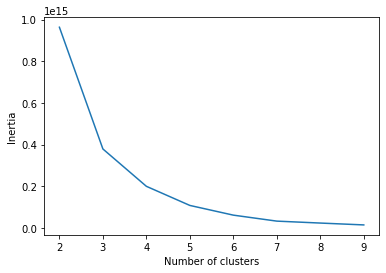

In [10]:
import numpy as np
from sklearn.cluster import KMeans
x=np.array(list(zip(x,y)))
inertias=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10),inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();


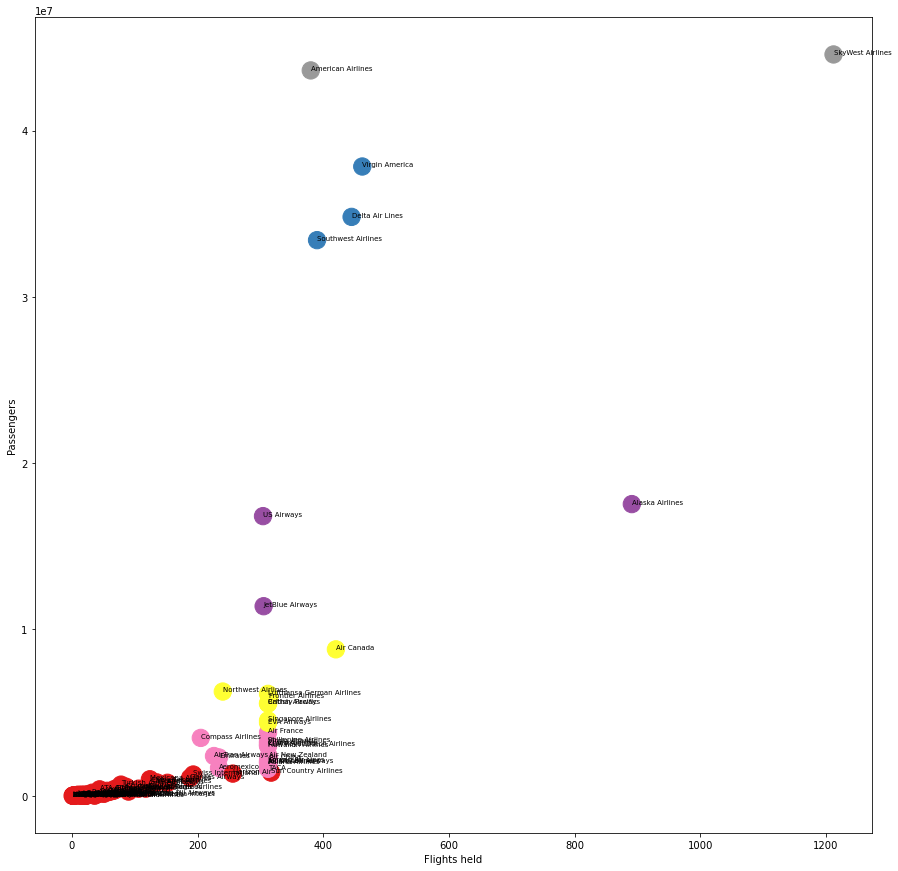

In [11]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)
plt.figure(figsize=(15,15))
plt.xlabel('Flights held')
plt.ylabel('Passengers')
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=300,cmap='Set1')
for i,txt in enumerate(airline_count.index.values):
    plt.annotate(txt,(x[i,0],x[i,1]),size=7)
plt.show();

The average silhouette score is:0.720496094915654


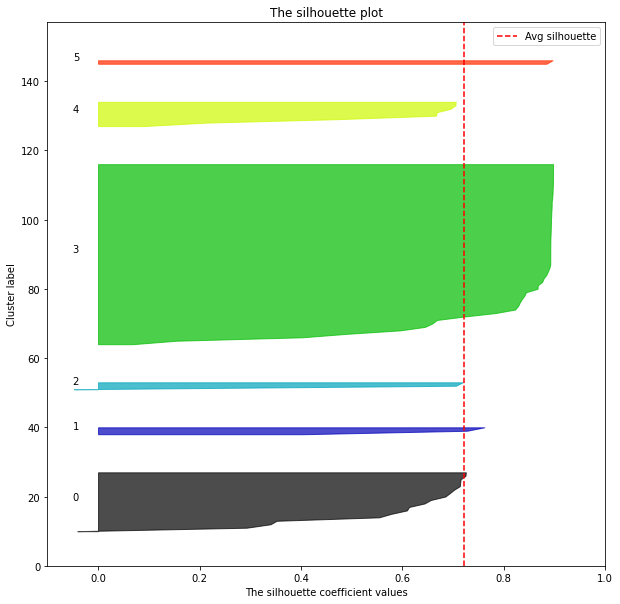

In [12]:
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
n_clusters=6
plt.figure(figsize=(10,10))
plt.gca().set_xlim([-0.1,1])
plt.gca().set_ylim([0,len(x)+(n_clusters+1)*10])
clusterer=KMeans(n_clusters=n_clusters,random_state=10)
labels=clusterer.fit_predict(x)
print('The average silhouette score is:{}'.format(silhouette_score(x,labels)))
sample_silhouette_values=silhouette_samples(x,labels)
y_lower=10
for i in range(n_clusters):
    ith_cluster_silhouette_values=\
    sample_silhouette_values[labels==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i
    color=cm.nipy_spectral(float(i)/n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
    plt.gca().text(-0.05,y_lower+0.5*size_cluster_i,str(i))
    y_lower=y_upper+10
plt.gca().axvline(x=silhouette_score(x,labels),color='red',linestyle='--',label='Avg silhouette')
plt.title('The silhouette plot')
plt.xlabel('The silhouette coefficient values')
plt.ylabel('Cluster label')
plt.legend()
plt.show();

In [13]:
df['Operating Airline'].value_counts()

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [14]:
airline_count.sort_index(inplace=True)

In [15]:
airline_count

ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                 44
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 3
XL Airways France                            51
Xtra Airways                                  2
Name: Operating Airline, Length: 87, dtype: int64

In [16]:
airline_count.index.values

array(['ABC Aerolineas S.A. de C.V. dba Interjet', 'ATA Airlines',
       'Aer Lingus', 'Aeromexico', 'Air Berlin', 'Air Canada',
       'Air Canada Jazz', 'Air China', 'Air France', 'Air India Limited',
       'Air New Zealand', 'Air Pacific Limited dba Fiji Airways',
       'AirTran Airways', 'Alaska Airlines', 'All Nippon Airways',
       'Allegiant Air', 'American Airlines', 'American Eagle Airlines',
       'Ameriflight', 'Asiana Airlines', 'Atlantic Southeast Airlines',
       'Atlas Air, Inc', 'BelAir Airlines', 'Boeing Company',
       'British Airways', 'COPA Airlines, Inc.', 'Cathay Pacific',
       'China Airlines', 'China Eastern', 'China Southern',
       'Compass Airlines', 'Delta Air Lines', 'EVA Airways', 'Emirates',
       'Etihad Airways', 'Evergreen International Airlines',
       'ExpressJet Airlines', 'Finnair', 'French Bee',
       'Frontier Airlines', 'Hawaiian Airlines',
       'Hong Kong Airlines Limited', 'Horizon Air', 'Iberia',
       'Icelandair', 'Icelanda

In [17]:
df_1=airline_count+passenger_count

In [18]:
df_1

ABC Aerolineas S.A. de C.V. dba Interjet      15593
ATA Airlines                                 384808
Aer Lingus                                   777843
Aeromexico                                  1673180
Air Berlin                                   235215
                                             ...   
WOW Air                                      295224
WestJet Airlines                             799936
World Airways                                   788
XL Airways France                            119012
Xtra Airways                                    148
Length: 87, dtype: int64

In [19]:
airline_count

ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                 44
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 3
XL Airways France                            51
Xtra Airways                                  2
Name: Operating Airline, Length: 87, dtype: int64

In [20]:
passenger_count

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      15585
ATA Airlines                                 384764
Aer Lingus                                   777691
Aeromexico                                  1672946
Air Berlin                                   235155
                                             ...   
WOW Air                                      295168
WestJet Airlines                             799801
World Airways                                   785
XL Airways France                            118961
Xtra Airways                                    146
Name: Passenger Count, Length: 87, dtype: int64

In [21]:
list(zip(x,y))

[(array([    8, 15585], dtype=int64), 15585),
 (array([    44, 384764], dtype=int64), 384764),
 (array([   152, 777691], dtype=int64), 777691),
 (array([    234, 1672946], dtype=int64), 1672946),
 (array([    60, 235155], dtype=int64), 235155),
 (array([    420, 8804894], dtype=int64), 8804894),
 (array([  14, 4119], dtype=int64), 4119),
 (array([    313, 2260334], dtype=int64), 2260334),
 (array([    312, 3801038], dtype=int64), 3801038),
 (array([    66, 293499], dtype=int64), 293499),
 (array([    313, 2380307], dtype=int64), 2380307),
 (array([   38, 67815], dtype=int64), 67815),
 (array([    226, 2388648], dtype=int64), 2388648),
 (array([     891, 17540235], dtype=int64), 17540235),
 (array([    312, 2016793], dtype=int64), 2016793),
 (array([   16, 24269], dtype=int64), 24269),
 (array([     380, 43622387], dtype=int64), 43622387),
 (array([   106, 424692], dtype=int64), 424692),
 (array([ 22, 110], dtype=int64), 110),
 (array([    312, 1954588], dtype=int64), 1954588),
 (array(

In [22]:
np.array(list(zip(x,y)))

C:\Users\hfran\AppData\Local\Temp/ipykernel_5412/3925155371.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(list(zip(x,y)))


array([[array([    8, 15585], dtype=int64), 15585],
       [array([    44, 384764], dtype=int64), 384764],
       [array([   152, 777691], dtype=int64), 777691],
       [array([    234, 1672946], dtype=int64), 1672946],
       [array([    60, 235155], dtype=int64), 235155],
       [array([    420, 8804894], dtype=int64), 8804894],
       [array([  14, 4119], dtype=int64), 4119],
       [array([    313, 2260334], dtype=int64), 2260334],
       [array([    312, 3801038], dtype=int64), 3801038],
       [array([    66, 293499], dtype=int64), 293499],
       [array([    313, 2380307], dtype=int64), 2380307],
       [array([   38, 67815], dtype=int64), 67815],
       [array([    226, 2388648], dtype=int64), 2388648],
       [array([     891, 17540235], dtype=int64), 17540235],
       [array([    312, 2016793], dtype=int64), 2016793],
       [array([   16, 24269], dtype=int64), 24269],
       [array([     380, 43622387], dtype=int64), 43622387],
       [array([   106, 424692], dtype=int64), 4